c:\Users\ASUS\Documents\ML practicals\repository\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


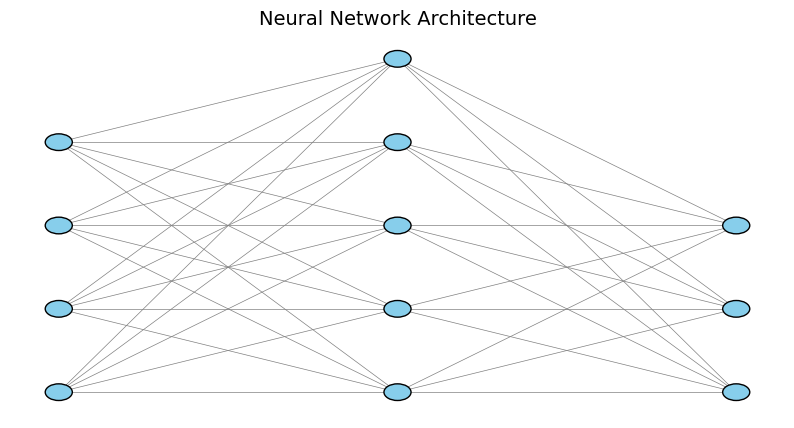

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Step 2: Preprocess data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 3: Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Neural Network
mlp = MLPClassifier(hidden_layer_sizes=(5,), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Step 5: Visualize the network structure
def draw_nn(input_size, hidden_layers, output_size):
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.axis('off') 

    layer_sizes = [input_size] + list(hidden_layers) + [output_size]
    v_spacing = 1. / max(layer_sizes)
    h_spacing = 1. / (len(layer_sizes) - 1)

    neuron_positions = {}
    for i, layer_size in enumerate(layer_sizes):
        layer_y = [v_spacing * (j + 1) for j in range(layer_size)]
        layer_x = [h_spacing * i] * layer_size
        for x, y in zip(layer_x, layer_y):
            neuron_positions[(i, layer_y.index(y))] = (x, y)
            ax.add_patch(plt.Circle((x, y), 0.02, color='skyblue', ec='black', zorder=4))

    # Draw connections
    for i in range(len(layer_sizes) - 1):
        for a in range(layer_sizes[i]):
            for b in range(layer_sizes[i+1]):
                start = neuron_positions[(i, a)]
                end = neuron_positions[(i+1, b)]
                ax.plot([start[0], end[0]], [start[1], end[1]], 'gray', linewidth=0.5)

    plt.title("Neural Network Architecture", fontsize=14)
    plt.show()

# Step 6: Call the visualization
draw_nn(input_size=X.shape[1], hidden_layers=mlp.hidden_layer_sizes, output_size=len(set(y)))
